In [1]:
import torch
import numpy as np
import torch.optim as optim
import torch.nn.functional as f
from Models import loadCedarData, PCA_Transformation, CNN_Classifier_Cedar

# PCA Based Classification


## Importing Data

In [2]:
X_train, X_test, y_train, y_test = loadCedarData(toType='ndarray', test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2112, 224, 224) (2112,)
(528, 224, 224) (528,)


## Reshaping Data

In [3]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

print(X_train.shape, X_test.shape)

(2112, 50176) (528, 50176)


In [4]:
X = np.concatenate((X_train, X_test), axis=0)

print(X.shape)

(2640, 50176)


## Analysis with PCA

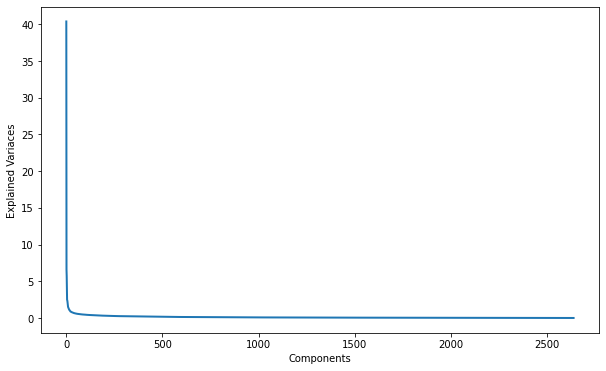

Recomended value for n_component is 77


In [5]:
pca = PCA_Transformation()
pca.findOptimumComponent(X)

In [6]:
pca.fit(X_train)
X_train, X_test = pca.transformData(X_train, X_test)

## Training Results

In [7]:
pca.classifyAndEvaluate(X_train, X_test, y_train, y_test)

Model Name:  SVC
Model Accuracy:  0.9962121212121212
Model Precision:  0.9925093632958801
Model f_score:  0.9962406015037594
Model Recall Score:  1.0


Model Name:  NaiveBayes
Model Accuracy:  0.7272727272727273
Model Precision:  0.4606741573033708
Model f_score:  0.6307692307692307
Model Recall Score:  1.0


Model Name:  KNN
Model Accuracy:  0.9886363636363636
Model Precision:  0.9775280898876404
Model f_score:  0.9886363636363636
Model Recall Score:  1.0


Model Name:  Decision Tree
Model Accuracy:  0.9943181818181818
Model Precision:  0.9925093632958801
Model f_score:  0.9943714821763602
Model Recall Score:  0.9962406015037594


Model Name:  Logistic Regression
Model Accuracy:  0.9962121212121212
Model Precision:  0.9925093632958801
Model f_score:  0.9962406015037594
Model Recall Score:  1.0


Model Name:  Linear Discriminant Analysis
Model Accuracy:  0.9943181818181818
Model Precision:  0.9887640449438202
Model f_score:  0.9943502824858756
Model Recall Score:  1.0




***

# CNN Based Classification

## Importing Data

In [8]:
X, y = loadCedarData(toType='tensor')

print(X.shape, y.shape)

torch.Size([2640, 1, 224, 224]) torch.Size([2640])


## Batchloader

In [9]:
def getBatch(index, batch_size, maxlen):
    if (index+1)*batch_size > maxlen:
        return X[index*batch_size:], y[index*batch_size:]
    else:
        return X[index*batch_size:(index+1)*batch_size], y[index*batch_size:(index+1)*batch_size]

## Training Loop

In [14]:
num_epoch = 15
batch_size = 50
dataset_len = X.shape[0]

network = CNN_Classifier_Cedar()
optimizer = optim.Adam(network.parameters(), lr=1e-3)

losses = []
correct = []

for epoch in range(num_epoch):
    total_loss = 0
    total_correct = 0
    for index in range(dataset_len//batch_size+1):
        images, labels = getBatch(index, batch_size, dataset_len)
        preds = network(images)
        loss = f.cross_entropy(preds, labels.to(torch.int64))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_correct += network.get_num_correct(labels, preds)

    losses.append(total_loss)
    correct.append(total_correct)
    print('epoch: {}, total_loss: {:.2f}, total_correct: {}'.format(epoch+1, total_loss, total_correct))

epoch: 1, total_loss: 35.85, total_correct: 1477
epoch: 2, total_loss: 31.95, total_correct: 1763
epoch: 3, total_loss: 29.84, total_correct: 1859
epoch: 4, total_loss: 25.53, total_correct: 2035
epoch: 5, total_loss: 28.23, total_correct: 1950
epoch: 6, total_loss: 23.45, total_correct: 2121
epoch: 7, total_loss: 23.58, total_correct: 2086
epoch: 8, total_loss: 21.19, total_correct: 2176
epoch: 9, total_loss: 19.24, total_correct: 2212
epoch: 10, total_loss: 19.25, total_correct: 2204
epoch: 11, total_loss: 16.48, total_correct: 2290
epoch: 12, total_loss: 13.24, total_correct: 2369
epoch: 13, total_loss: 11.20, total_correct: 2427
epoch: 14, total_loss: 10.06, total_correct: 2425
epoch: 15, total_loss: 9.56, total_correct: 2459


## Training Results

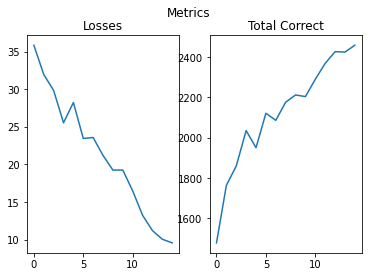

In [15]:
network.graph(losses, correct)